In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from torchsummary import summary
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\data\Student_performance_data _.csv")
df.sample(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
859,1860,17,0,0,1,1.979372,7,1,3,1,0,0,0,2.877854,2.0
1366,2367,17,0,0,2,16.085223,13,0,3,1,0,1,0,2.578668,2.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
1586,2587,15,0,0,2,10.463163,27,1,0,1,0,0,0,0.654490,4.0
2223,3224,15,0,0,0,0.451394,9,0,1,0,0,0,0,1.756186,4.0


In [3]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
#split dataset

#convert numpy arrays
X = df.drop(columns=['Tutoring', 'StudentID']).values
y = df['Tutoring'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print('X_train shape is : {}'.format(X_train.shape),'\n')
print('X_test  shape is : {}'.format(X_test.shape),'\n')
print('y_train shape is : {}'.format(y_train.shape),'\n')
print('y_test  shape is : {}'.format(y_test.shape),'\n')

X_train shape is : (1913, 13) 

X_test  shape is : (479, 13) 

y_train shape is : (1913,) 

y_test  shape is : (479,) 



In [5]:
type(X_train)

numpy.ndarray

In [6]:
data_loader = DataLoader(dataset = list(zip(X_train, y_train)),batch_size = 16, shuffle = True)
data, labels = next(iter(data_loader))

print("The shape of singular batch size of training : {}".format(data.size()))
print("The shape of singular batch size of testing  : {}".format(labels.size()))
     

The shape of singular batch size of training : torch.Size([16, 13])
The shape of singular batch size of testing  : torch.Size([16])


In [7]:
###ANN building

class StudentClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #create 1st hidden layer
        self.hidden_layer_1 = nn.Linear(in_features=13, out_features=128, bias=True)
        self.activation_1 = nn.ReLU()
        #create 2nd hidden layer
        self.hidden_layer_2 = nn.Linear(in_features=128, out_features=64, bias=True)
        self.activation_2 = nn.ReLU()
        #create output layer
        self.output_layer = nn.Linear(in_features=64, out_features=1, bias=True)
        self.activation_output = nn.Sigmoid()
        
    def forward(self, x):
        #activation(W^T + B); x = training dataset
        X = self.hidden_layer_1(x)
        X = self.activation_1(X)
        X = self.hidden_layer_2(X)
        X = self.activation_2(X)
        X = self.output_layer(X)
        X = self.activation_output(X)
        
        return X
    
    
model = StudentClassifier()
print(model, '\n\n\n')
print(model.parameters)

StudentClassifier(
  (hidden_layer_1): Linear(in_features=13, out_features=128, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation_output): Sigmoid()
) 



<bound method Module.parameters of StudentClassifier(
  (hidden_layer_1): Linear(in_features=13, out_features=128, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation_output): Sigmoid()
)>


In [8]:
print(model.parameters(),'\n\n\n')
summary(model, X_train.shape)

<generator object Module.parameters at 0x000001B71771C580> 



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1913, 128]           1,792
              ReLU-2            [-1, 1913, 128]               0
            Linear-3             [-1, 1913, 64]           8,256
              ReLU-4             [-1, 1913, 64]               0
            Linear-5              [-1, 1913, 1]              65
           Sigmoid-6              [-1, 1913, 1]               0
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/backward pass size (MB): 5.63
Params size (MB): 0.04
Estimated Total Size (MB): 5.77
----------------------------------------------------------------


In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
#training
dtype = torch.float32 #making same dtype for X, y
epochs = 64
Loss = []
model.train()
for epoch in range(epochs):
    #Call data_loader so that we can pass the X_train data to the model with batch_size
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(dtype=dtype)
        y_batch = y_batch.to(dtype=dtype)
        #pass X_batch to the model
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.reshape(-1,1))
        Loss.append(loss)
        #Initialize the Gradient
        optimizer.zero_grad()
        #calculating loss, then do back propagation
        loss.backward()
        optimizer.step()
    print('Epoch {}, Loss {}'.format(epoch, loss))

Epoch 0, Loss 0.5444369912147522
Epoch 1, Loss 0.625123143196106
Epoch 2, Loss 0.5027535557746887
Epoch 3, Loss 0.5186610221862793
Epoch 4, Loss 0.4283457100391388
Epoch 5, Loss 0.5373605489730835
Epoch 6, Loss 0.6827988028526306
Epoch 7, Loss 0.48820412158966064
Epoch 8, Loss 0.5869844555854797
Epoch 9, Loss 0.4740894138813019
Epoch 10, Loss 0.3450116515159607
Epoch 11, Loss 0.3562864065170288
Epoch 12, Loss 0.5613839626312256
Epoch 13, Loss 0.19043342769145966
Epoch 14, Loss 0.43131983280181885
Epoch 15, Loss 0.5232415199279785
Epoch 16, Loss 0.4238390326499939
Epoch 17, Loss 0.3556756377220154
Epoch 18, Loss 0.413947194814682
Epoch 19, Loss 0.5157075524330139
Epoch 20, Loss 0.6102952361106873
Epoch 21, Loss 0.29046130180358887
Epoch 22, Loss 0.4042937159538269
Epoch 23, Loss 0.2862425744533539
Epoch 24, Loss 0.25708240270614624
Epoch 25, Loss 0.4329336881637573
Epoch 26, Loss 0.6181137561798096
Epoch 27, Loss 0.41164645552635193
Epoch 28, Loss 0.5100407600402832
Epoch 29, Loss 0.559

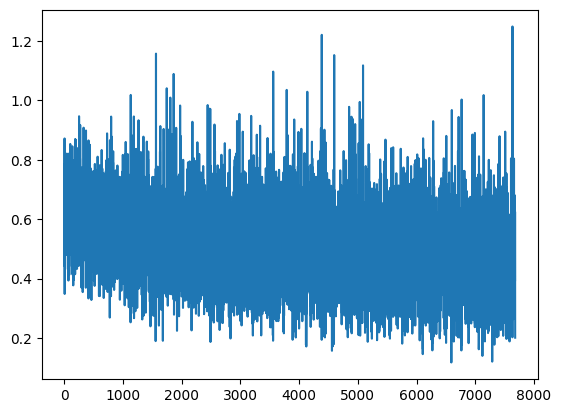

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(Loss)

In [12]:
X_test_tensor = torch.from_numpy(X_test).float()  # Convert to tensor and ensure it's of type float32
predicted = model(X_test_tensor)

In [13]:
y_pred = torch.where(predicted.flatten() > 0.5, 1, 0)

In [14]:
print("The accuracy score is  : ", accuracy_score(y_pred, y_test))
print("The precision score is : ", precision_score(y_pred, y_test))
print("The recall score is    : ", recall_score(y_pred, y_test))
print("The f1 score of ths is : ", f1_score(y_pred, y_test))

The accuracy score is  :  0.6993736951983298
The precision score is :  0.46153846153846156
The recall score is    :  0.49624060150375937
The f1 score of ths is :  0.4782608695652174


### rather than accuracy score I try to show the architecture of ANN with pytorch

# Thanks

In [17]:
#display the weights and biases
model.state_dict()

OrderedDict([('hidden_layer_1.weight',
              tensor([[-0.0068, -0.3332, -0.0206,  ...,  0.1447, -0.9161, -0.1385],
                      [-0.3048, -0.7185,  0.1483,  ...,  0.2482, -0.3410, -0.2887],
                      [-0.1766,  0.0529, -0.0999,  ...,  0.0149, -0.2616, -0.1428],
                      ...,
                      [-0.0365,  0.1047,  0.1363,  ..., -0.0356,  0.0314, -0.2457],
                      [ 0.1090, -0.0721, -0.2045,  ...,  0.0466,  0.5422, -0.3609],
                      [-0.0241, -0.0797,  0.0436,  ..., -0.1738, -0.3158,  0.4181]])),
             ('hidden_layer_1.bias',
              tensor([ 0.0836,  0.0425,  0.0198, -0.1714,  0.1449, -0.2025,  0.1242, -0.2488,
                       0.1079, -0.2003, -0.2369,  0.3213,  0.1181,  0.2426,  0.0971, -0.1932,
                       0.2224,  0.1083,  0.1232, -0.1107, -0.3212, -0.0093, -0.0815,  0.0750,
                       0.0985,  0.0962,  0.3908, -0.1861, -0.1895, -0.0130,  0.1400,  0.0289,
              

In [18]:
#the key() of model.state_dict() functions
print(model.state_dict().keys())

odict_keys(['hidden_layer_1.weight', 'hidden_layer_1.bias', 'hidden_layer_2.weight', 'hidden_layer_2.bias', 'output_layer.weight', 'output_layer.bias'])


In [19]:
"""
  Define a function named `checkpoint`
  torch.save(model_weight, filename). filename might be [`best_model.pth`]
"""
def checkpoint(model = None, filename = None):
  try:
    torch.save(model.state_dict(), filename)
  except Exception as e:
    print(e.with_traceback)

"""
  Define the function named `resume`
  torch.load(filename): - filename might be [`best_model.pth`]
"""
def resume(model = None, filename = None):
  try:
    model.load_state_dict(torch.load(filename))
  except Exception as e:
    print(e.with_traceback)